In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.style.use('seaborn-colorblind')

## Read in Excel files of data and question labels
XLS = pd.ExcelFile('../../ComputationSurveyData/LabeledComputationDataColumnRenamed.xlsx')
XLS2 = pd.ExcelFile('../../ComputationSurveyData/Questions.xlsx')

## Parse the appropriate sheets into dataframes
df = XLS.parse('LabeledComputationData')
questions = XLS2.parse('Sheet1')

outDir = "/Users/caballero/Repos/research/papers/2017_CompSurvey/figs/"

bboxprops = {'facecolor':'white', 'pad':0.5, 'boxstyle':'round', 'edgecolor':'lightgrey', 'alpha':0.7}

Number of Unique Schools:  357
Number of Schools with at least one computational teacher:  Q1    263
dtype: int64
Number of Schools with at least fifty percent computational teacher:  Q1    195
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


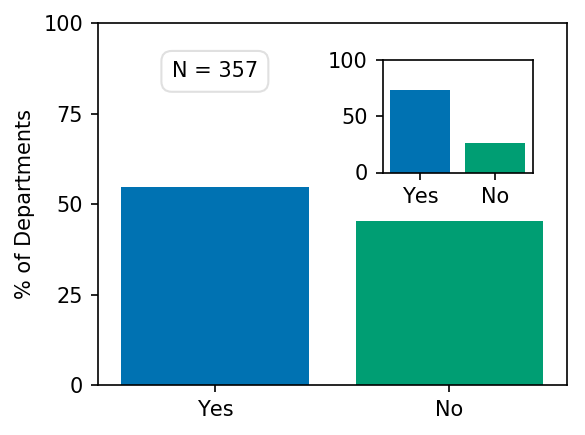

In [125]:
## Teaching Computation at all

question = 'Q1'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithOneTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()
numberOfUniqueSchools = df['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneTeacher)
print('Number of Schools with at least fifty percent computational teacher: ', numberOfSchoolsWithFiftyPercent)

atLeastOne = numberOfSchoolsWithOneTeacher/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercent/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.65, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'FiftyPercentWInset.pdf')

In [120]:
qBySchool = df[['NAME','Q11']]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool['Q11'] > 0) & (qBySchool['Q11'] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)
qFrac.head(n=10)

,Q11
NAME,
Alabama A & M University,0.000000
Albright College,1.000000
Alfred University,1.000000
Allan Hancock College,0.000000
Allegany College of Maryland,0.000000
Amarillo College,0.000000
American University,0.750000
Amherst College,0.666667
Andrews University,1.000000


In [123]:
qFrac[qFrac > 0.5].count()

Q11    100
dtype: int64

Number of Unique Schools:  357
Number of Schools with at least one computational teacher:  Q8    191
dtype: int64
Number of Schools with at least fifty percent computational teacher:  Q8    85
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


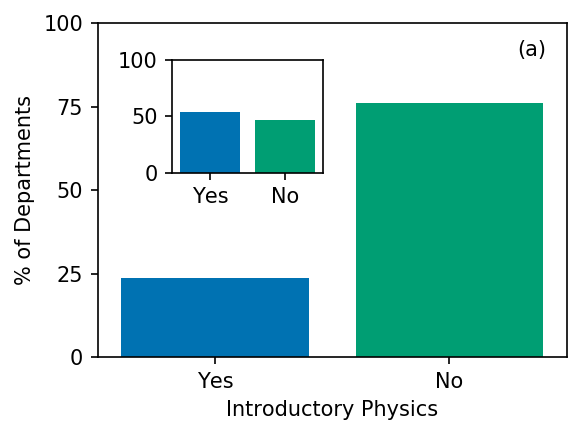

In [137]:
## Teaching computaiton in Intro Physics

question = 'Q8'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithOneIntroTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercentIntro = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = df['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneIntroTeacher)
print('Number of Schools with at least fifty percent computational teacher: ', numberOfSchoolsWithFiftyPercentIntro)

atLeastOne = numberOfSchoolsWithOneIntroTeacher/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercentIntro/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel('Introductory Physics')
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])

ax1.text(1.35, 90, '(a)', ha='center')
# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'FiftyPercentWInsetIntro.pdf')

Number of Unique Schools:  357
Number of Schools with at least one computational teacher:  Q11    184
dtype: int64
Number of Schools with at least fifty percent computational teacher:  Q11    100
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


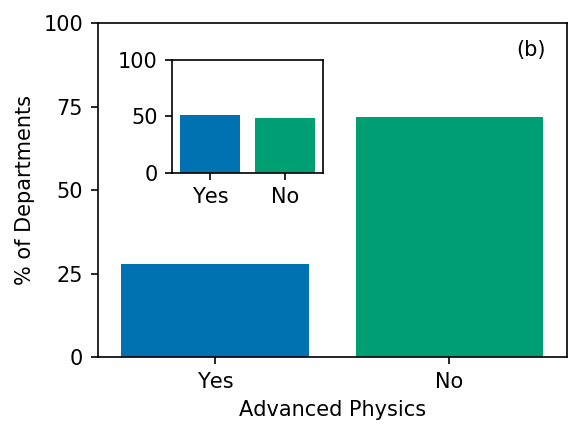

In [138]:
## Teaching computaiton in Advanced Physics

question = 'Q11'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithOneIntroTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercentIntro = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = df['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneIntroTeacher)
print('Number of Schools with at least fifty percent computational teacher: ', numberOfSchoolsWithFiftyPercentIntro)

atLeastOne = numberOfSchoolsWithOneIntroTeacher/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercentIntro/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel('Advanced Physics')

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

ax1.text(1.35, 90, '(b)', ha='center')

plt.tight_layout()
plt.savefig(outDir + 'FiftyPercentWInsetAdvanced.pdf')